In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [19]:
X, y = make_blobs(n_samples=500, n_features= 2, centers= 4, cluster_std=1.5, random_state=4)
print(X)
print(y)

[[ 10.13105098  -9.81665726]
 [  9.69199316   5.47078322]
 [  8.43026586   3.26511398]
 [  8.47592686   5.09679909]
 [ 10.26860131   0.81266459]
 [  2.24341673  -4.00528224]
 [ 11.08687812   1.30863522]
 [  2.78369887  -3.67391407]
 [  9.08789003   6.69196083]
 [  8.38646041 -13.51357423]
 [  4.72252161  -4.89674361]
 [ 10.81316277   0.59069431]
 [ 10.2792478  -10.71497092]
 [  7.72766164   3.97825258]
 [ 10.55485244 -10.61685598]
 [ 10.35129902   2.48432744]
 [ 11.62258649   4.31500984]
 [  2.36481944  -6.5932803 ]
 [  9.04022027   5.24509157]
 [  3.49038333  -5.39890422]
 [ 11.16257799 -11.01212818]
 [ 10.6333549   -9.94142734]
 [  1.36794067  -6.94740231]
 [ -0.08814428  -4.08406737]
 [  3.25342201  -6.8733241 ]
 [  9.83897183  -0.77656997]
 [  9.49879595  -8.72097195]
 [  9.06994475   3.76490633]
 [  9.88155376  -1.32771147]
 [  4.09786368  -6.00301315]
 [  9.70696643   5.51464701]
 [  9.96214561  -9.30216057]
 [  9.38389897 -10.70922239]
 [  9.13438834   3.66254374]
 [  9.53395597

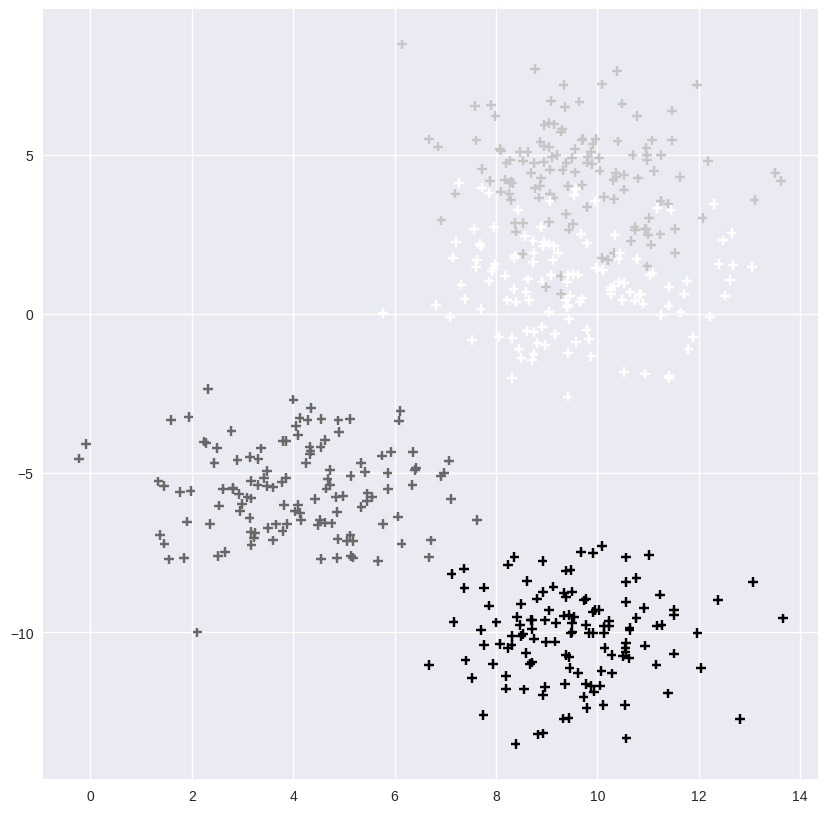

In [15]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker='+', edgecolors='yellow')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=3)

In [21]:
knn5.fit(X_train, y_train)
knn3.fit(X_train, y_train)

y_pred5 = knn5.predict(X_test)
y_pred3 = knn3.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

print("K=5 accuracy: ", accuracy_score(y_test, y_pred5)*100)
print("k=3 accuracy: ", accuracy_score(y_test, y_pred3)*100)

K=5 accuracy:  93.60000000000001
k=3 accuracy:  92.80000000000001


We see that the k=5 model has higher accuracy than the k=3 model, so let's increase k.

In [25]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)

y_preds_7 = knn7.predict(X_test)
print("k=7 accuracy: ", accuracy_score(y_test, y_preds_7)*100)

k=7 accuracy:  94.39999999999999


I think I'll just write a loop with the value of k increasing by 1 every time till the accuracy starts to decrease.

In [26]:
k = 8
prev_accuracy = 94.4

while 1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_preds = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)*100
    print("k =", k, " accuracy: ", accuracy)

    if prev_accuracy > accuracy:
        print("Accuracy has decreased")
        break
    elif accuracy - prev_accuracy <0.5:
        print("Increase in accuracy negligible (<0.5)")
        break


k= 8  accuracy:  93.60000000000001
Accuracy has decreased


Damn!! 7 was the best...